Automatically detect rotation and line spacing of an image of text using
Radon transform
If image is rotated by the inverse of the output, the lines will be
horizontal (though they may be upside-down depending on the original image)
It doesn't work with black borders

In [1]:
from __future__ import division, print_function
from skimage.transform import radon
from PIL import Image
from numpy import asarray, mean, array, blackman
import numpy
from numpy.fft import rfft
import matplotlib.pyplot as plt
from matplotlib.mlab import rms_flat
try:
    # More accurate peak finding from
    # https://gist.github.com/endolith/255291#file-parabolic-py
    from parabolic import parabolic

    def argmax(x):
        return parabolic(x, numpy.argmax(x))[0]
except ImportError:
    from numpy import argmax

In [2]:
filename = '../eng.ocrb.exp13.jpg'

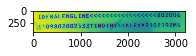

In [3]:
# Load file, converting to grayscale
I = asarray(Image.open(filename).convert('L'))
I = I - mean(I)  # Demean; make the brightness extend above and below zero
plt.subplot(2, 2, 1)
plt.imshow(I)

In [4]:
# Do the radon transform and display the result
sinogram = radon(I)

/Users/tlenglin/Library/Python/2.7/lib/python/site-packages/skimage/transform/radon_transform.py:58: UserWarning: The default of `circle` in `skimage.transform.radon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.radon` '


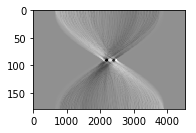

In [5]:
#plt.subplot(2, 2, 2)
#plt.imshow(sinogram.T, aspect='auto')
#plt.gray()

Rotation: -1.00 degrees


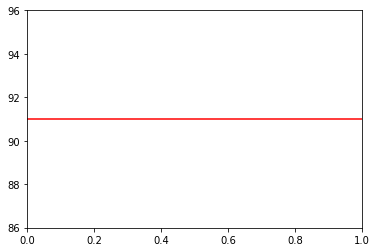

In [6]:
# Find the RMS value of each row and find "busiest" rotation,
# where the transform is lined up perfectly with the alternating dark
# text and white lines
r = array([rms_flat(line) for line in sinogram.transpose()])
rotation = argmax(r)
print('Rotation: {:.2f} degrees'.format(90 - rotation))
#plt.axhline(rotation, color='r')

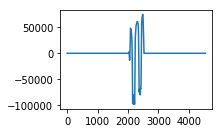

In [7]:
# Plot the busy row
#row = sinogram[:, rotation]
#N = len(row)
#plt.subplot(2, 2, 3)
#plt.plot(row)

Line spacing: 197.52 pixels


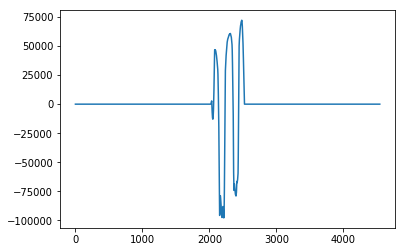

In [8]:
# Take spectrum of busy row and find line spacing
#window = blackman(N)
#spectrum = rfft(row * window)
#plt.plot(row * window)
#frequency = argmax(abs(spectrum))
#line_spacing = N / frequency  # pixels
#print('Line spacing: {:.2f} pixels'.format(line_spacing))

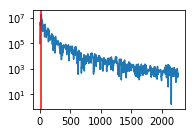

In [9]:
#plt.subplot(2, 2, 4)
#plt.plot(abs(spectrum))
#plt.axvline(frequency, color='r')
#plt.yscale('log')
#plt.show()

In [10]:
img = Image.open(filename)

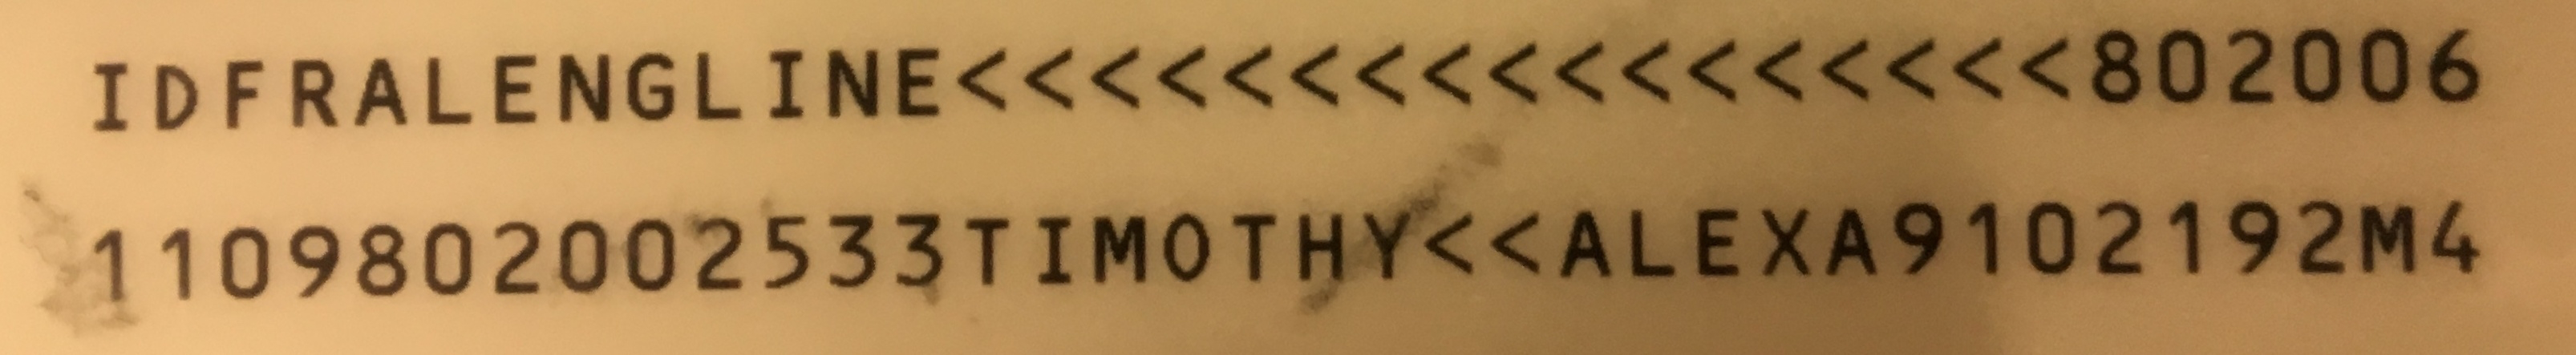

In [11]:
img

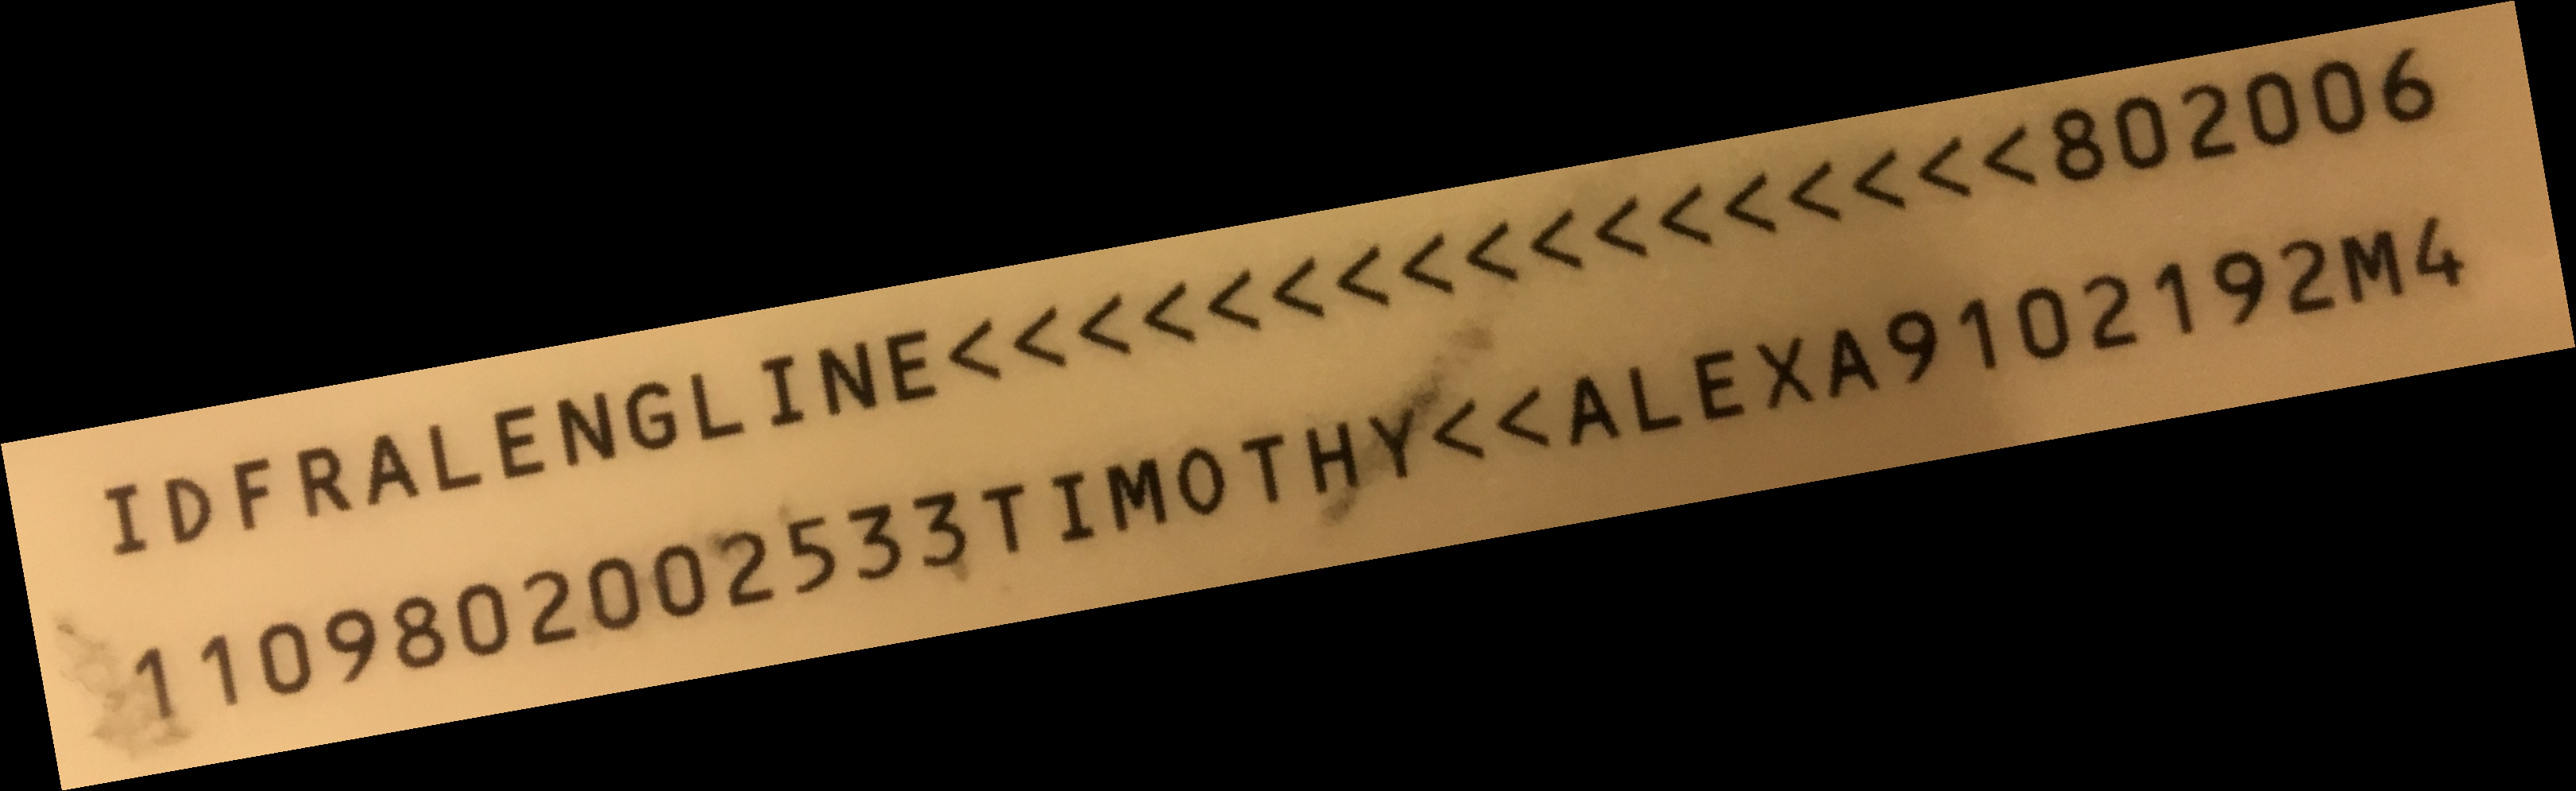

In [14]:
img2 = img.rotate(10, expand=True)
img2

Rotation: -10.00 degrees


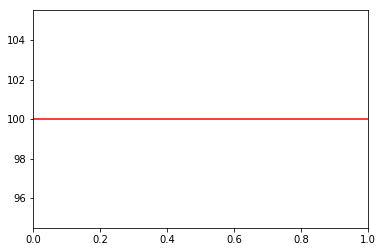

In [15]:
I2 = asarray(img2.convert('L'))
I2 = I2 - mean(I2)
sinogram2 = radon(I2)
r2 = array([rms_flat(line) for line in sinogram2.transpose()])
rotation2 = argmax(r2)
print('Rotation: {:.2f} degrees'.format(90 - rotation2))
plt.axhline(rotation2, color='r')

Rotation: 0.00 degrees


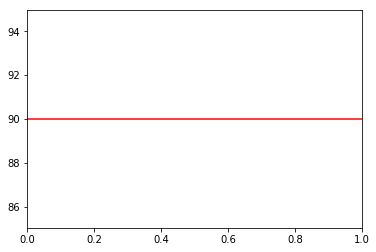

In [17]:
img3 = img2.rotate(-10, expand=True)
img3
I3 = asarray(img3.convert('L'))
I3 = I3 - mean(I3)
sinogram3 = radon(I3)
r3 = array([rms_flat(line) for line in sinogram3.transpose()])
rotation3 = argmax(r3)
print('Rotation: {:.2f} degrees'.format(90 - rotation3))
plt.axhline(rotation3, color='r')

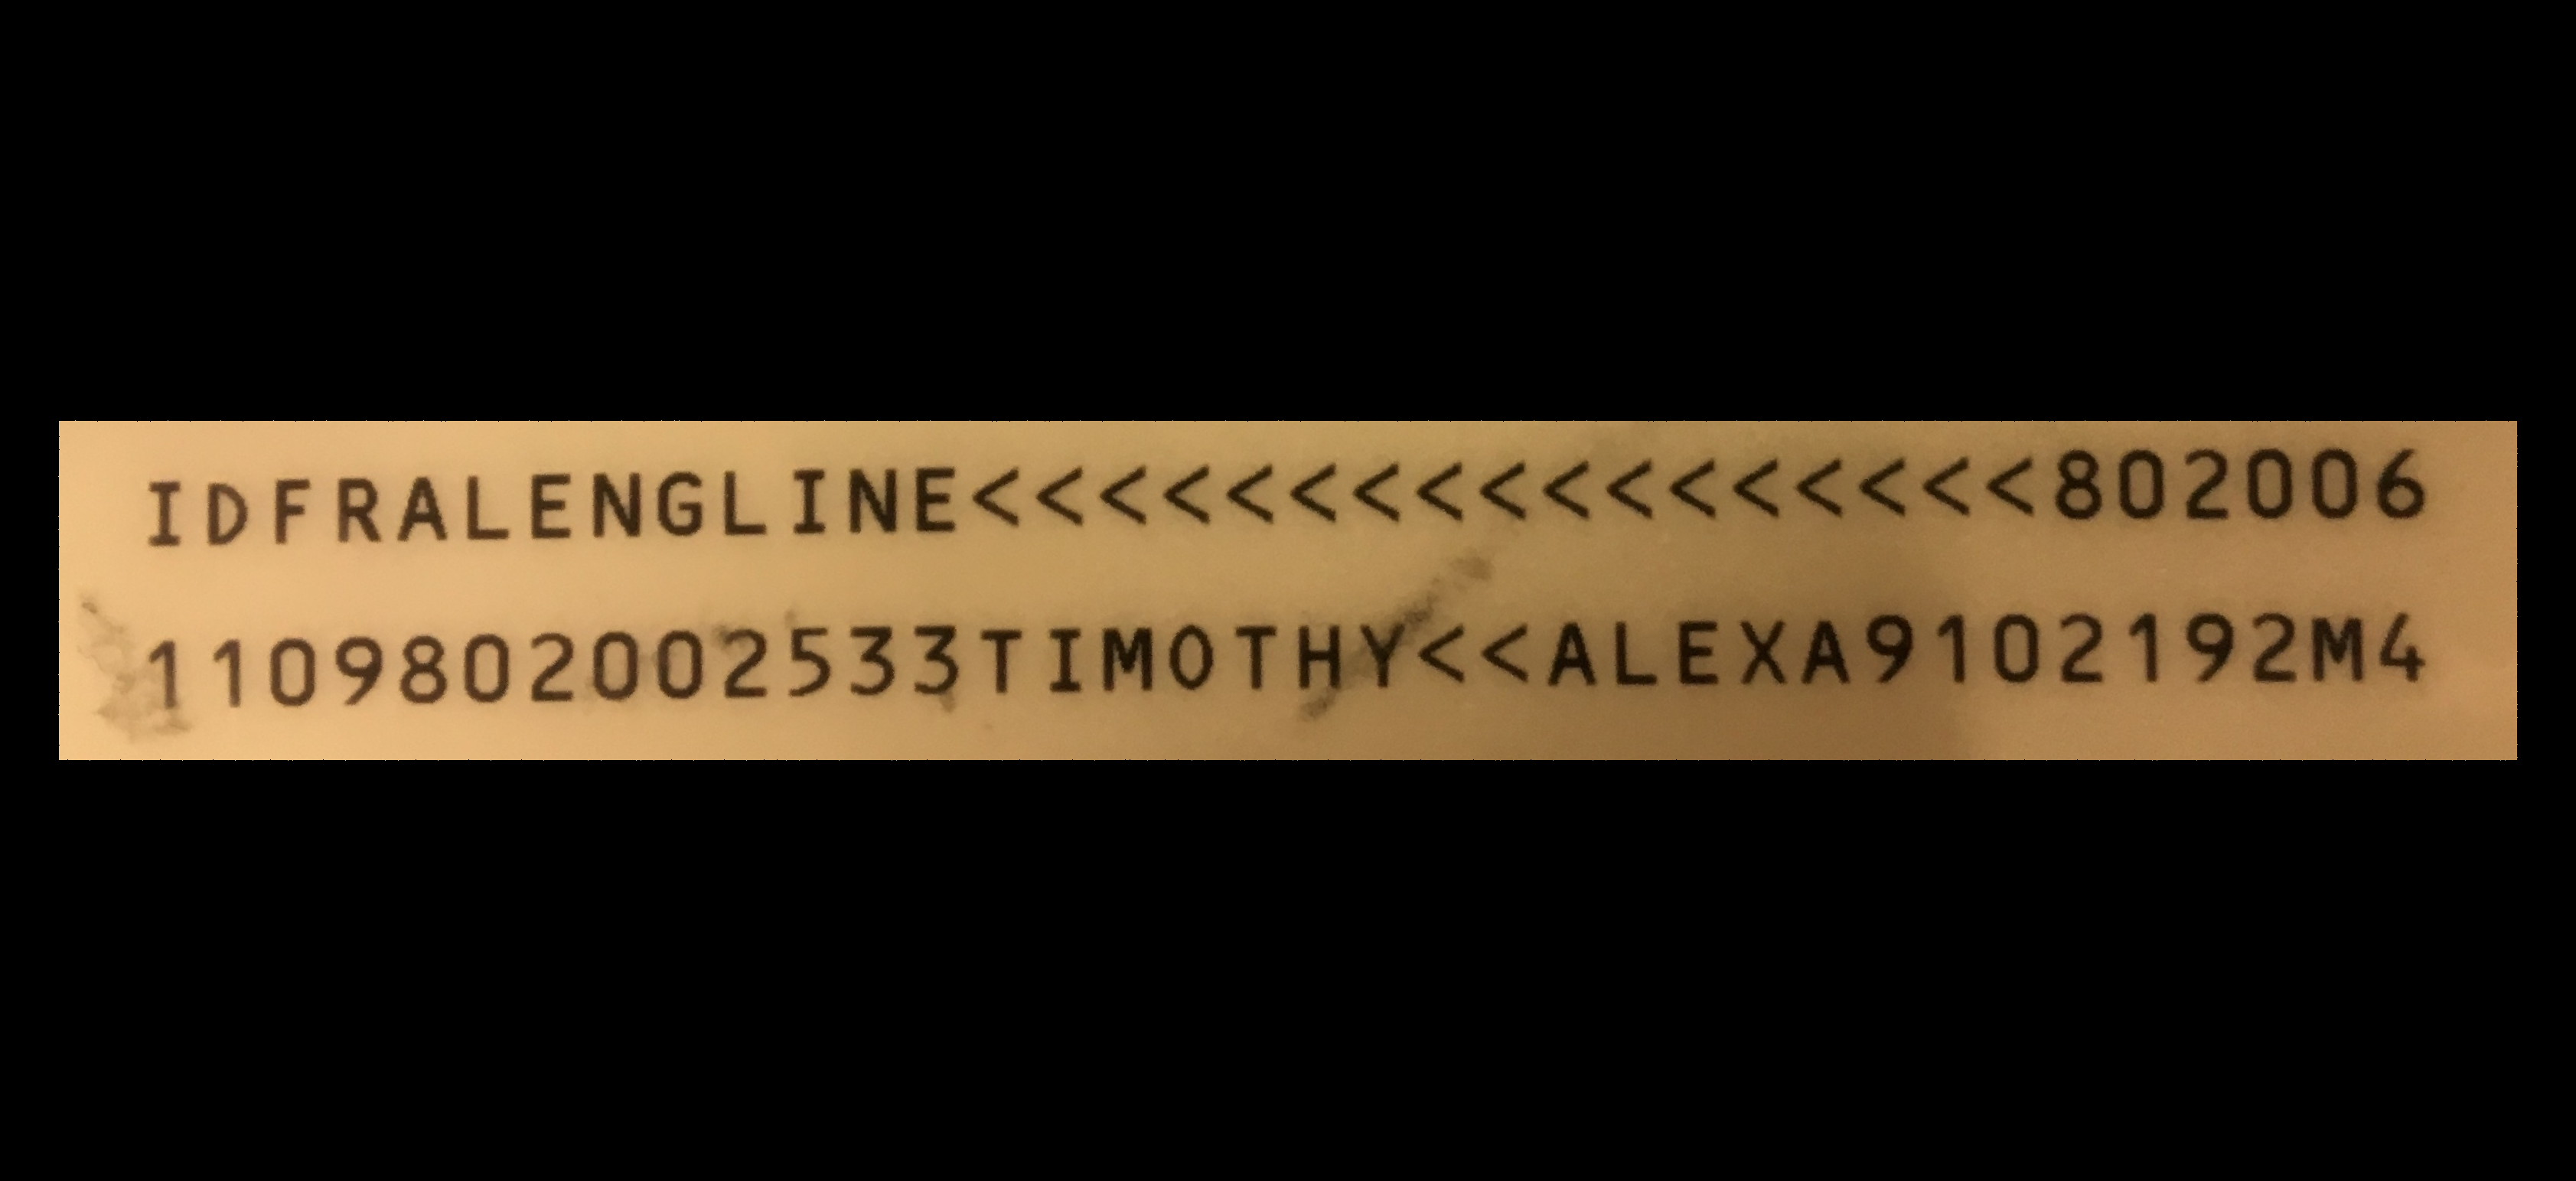

In [18]:
img3

In [ ]:
img3